# Chapter 2.  Tabular Value-Based Reinforcement Learning

In [1]:
import numpy as np
import gym
import random
import matplotlib.pyplot as plt

## 2.1.  Q-learning
- Implement Q-learning for Taxi, including the procedure to derive the best policy for the Q-table.
- Print the Q-table, to see the values on the squares. You could print a live policy as the search progresses.
- Try different values for $\varepsilon$, the exploration rate. Does it learn faster? Does it keep finding the optimal solution?
- Try different values for $\alpha$, the learning rate. Is it faster?

In [2]:
def taxi_qlearning(gamma: float=0.7, alpha: float=0.2, epsilon: float=0.1, epilogues: int=1000, show_log: bool=True):
    env = gym.make("Taxi-v3")
    env.reset()
    if show_log:
        env.render()

    # Q[state, action] table implementation
    Q = np.zeros([env.observation_space.n, env.action_space.n])
    x = []
    rewards_history = []

    for episode in range(0, epilogues+1):
        done = False
        total_reward = 0
        state = env.reset()
        while not done:
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  # Explore state space
            else:
                action = np.argmax(Q[state])  # Exploit learned values
            next_state, reward, done, info = env.step(action)  # invoke Gym
            next_max = np.max(Q[next_state])
            old_value = Q[state, action]

            new_value = old_value + alpha * (reward + gamma * next_max - old_value)

            Q[state, action] = new_value
            total_reward += reward
            state = next_state

        if episode % 100 == 0:
            x.append(episode)
            rewards_history.append(total_reward)            
            if show_log:
                print(f"Episode {episode} Total Reward: {total_reward}")
    
    return Q, x, rewards_history

In [3]:
Q, _, __ = taxi_qlearning()
print("\n", "Q.shape:", Q.shape, "\n")
print(Q)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Episode 0 Total Reward: -533
Episode 100 Total Reward: -335
Episode 200 Total Reward: -110
Episode 300 Total Reward: -177
Episode 400 Total Reward: -85
Episode 500 Total Reward: -32
Episode 600 Total Reward: 6
Episode 700 Total Reward: 14
Episode 800 Total Reward: -19
Episode 900 Total Reward: 14
Episode 1000 Total Reward: 7

 Q.shape: (500, 6) 

[[ 0.          0.          0.          0.          0.          0.        ]
 [-2.80469722 -2.75962122 -2.85172636 -2.7767327  -2.39236314 -8.30010011]
 [-1.75320337 -1.87266895 -2.02315054 -1.91167378  0.58741201 -2.        ]
 ...
 [-0.97760565  2.26898277 -0.91771156 -1.39726267 -2.         -3.39928011]
 [-2.52506079 -2.51326325 -2.51986463 -2.51483293 -3.88       -5.40771635]
 [-0.388      -0.388      -0.388       6.61024    -2.         -2.        ]]


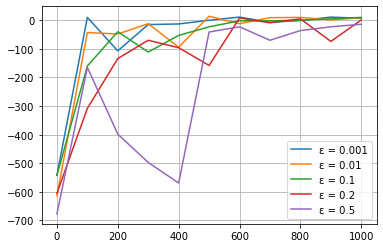

In [4]:
# Try different epsilons
epsilons = [0.001, 0.01, 0.1, 0.2, 0.5]
fig, ax = plt.subplots()

for epsilon in epsilons:
    _, y, x = taxi_qlearning(epsilon=epsilon, epilogues=1000,show_log=False)
    ax.plot(y, x, label=f"ε = {epsilon}")

ax.legend()
ax.grid()
plt.show()

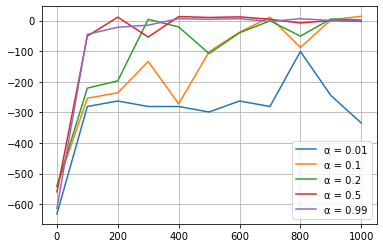

In [5]:
# Try different alpha
alphas = [0.01, 0.1, 0.2, 0.5, 0.99]
fig, ax = plt.subplots()

for alpha in alphas:
    _, y, x = taxi_qlearning(alpha=alpha, epilogues=1000,show_log=False)
    ax.plot(y, x, label=f"α = {alpha}")

ax.legend()
ax.grid()
plt.show()

## 2.2.  SARSA
- Implement SARSA.
- Compare your results to Q-learning, can you see how SARSA chooses different paths?
- Try different 𝜖 and 𝛼.

In [13]:
def taxi_sarsa(gamma: float=0.7, alpha: float=0.2, epsilon: float=0.1, epilogues: int=1000, show_log: bool=True, MOD: int=100):
    # Environment Setup
    env = gym.make("Taxi-v3")
    env.reset()
    if show_log:
        env.render()

    # Q[state,action] table implementation
    Q = np.zeros([env.observation_space.n, env.action_space.n])
    x = []
    rewards_history = []

    for episode in range(epilogues):
        done = False
        total_reward = 0
        current_state = env.reset()
        if random.uniform(0, 1) < epsilon:
            current_action = env.action_space.sample()  # Explore state space
        else:
            current_action = np.argmax(Q[current_state])  # Exploit learned values
        while not done:
            next_state, reward, done, info = env.step(current_action)  # invoke Gym
            if random.uniform(0, 1) < epsilon:
                next_action = env.action_space.sample()  # Explore state space
            else:
                next_action = np.argmax(Q[next_state])  # Exploit learned values
            sarsa_value = Q[next_state,next_action]
            old_value = Q[current_state, current_action]

            new_value = old_value + alpha * (reward + gamma * sarsa_value - old_value)

            Q[current_state,current_action] = new_value
            total_reward += reward
            current_state = next_state
            current_action = next_action

        if episode % MOD == 0:
            x.append(episode)
            rewards_history.append(total_reward)
            if show_log:
                print(f"Episode {episode} Total Reward: {total_reward}")

    return Q, x, rewards_history

In [14]:
Q, _, __ = taxi_sarsa()
print("\n", "Q.shape:", Q.shape, "\n")
print(Q)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Episode 0 Total Reward: -650
Episode 100 Total Reward: -254
Episode 200 Total Reward: 8
Episode 300 Total Reward: -24
Episode 400 Total Reward: 2
Episode 500 Total Reward: -62
Episode 600 Total Reward: -16
Episode 700 Total Reward: -2
Episode 800 Total Reward: -263
Episode 900 Total Reward: 5

 Q.shape: (500, 6) 

[[ 0.          0.          0.          0.          0.          0.        ]
 [-3.27594156 -3.27566652 -3.27749701 -3.28130343 -2.89375755 -6.43799273]
 [-2.59624288 -2.17551823 -2.3488055  -2.33267666 -1.01193459 -3.628     ]
 ...
 [-1.6214079  -1.61547834 -1.60808998 -1.59438029 -6.18046187 -4.9983056 ]
 [-2.77592916 -2.78124998 -2.79644016 -2.81047231 -7.41908178 -4.9528    ]
 [-0.5384     -0.388      -0.36        6.67538334 -3.628      -2.        ]]


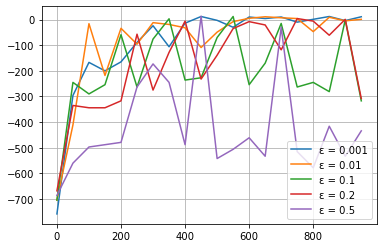

In [16]:
# Try different epsilons
epsilons = [0.001, 0.01, 0.1, 0.2, 0.5]
fig, ax = plt.subplots()

for epsilon in epsilons:
    _, y, x = taxi_sarsa(epsilon=epsilon, epilogues=1000, show_log=False, MOD=50)
    ax.plot(y, x, label=f"ε = {epsilon}")

ax.legend()
ax.grid()
plt.show()

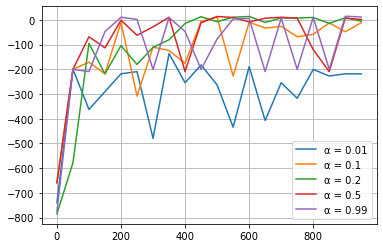

In [18]:
# Try different alpha
alphas = [0.01, 0.1, 0.2, 0.5, 0.99]
fig, ax = plt.subplots()

for alpha in alphas:
    _, y, x = taxi_sarsa(epsilon=0.01, alpha=alpha, epilogues=1000, show_log=False, MOD=50)
    ax.plot(y, x, label=f"α = {alpha}")

ax.legend()
ax.grid()
plt.show()

## 2.3.  Problem Size
- How large can problems be before converging starts taking too long?
- （どれくらいの問題サイズまでなら現実的な時間でQ-learningやSARSAによって収束させられるか？）

**回答**
- Q-learningのアルゴリズム・計算量は大まかにこんな感じ（SARSAもほぼ同様）
    - Qの初期化 $\dots$ $O(|S|\times |A|)$
    - Until 収束:
        - エピソードの初期状態 $s_0$
        - Until エピソードが終わるまで:
            - 行動選択: $a_t = \max_{a'}(Q(s_t, a'))$ またはランダムに選ぶ. $\dots$ $O(|A|)$
            - $Q$の更新: $Q(s_t, a_t) = Q(s_t, a_t) + \alpha (r_{t+1} + \gamma \max_{a'}Q(s_{t+1}, a') - Q(s_t, a_t))$ $\dots$ $O(|A|)$
- 1エピソードの長さは平均的に $O(|S|)$ であると仮定すると、全体の計算量は $O(\text{繰り返し回数} \times |S| \times |A|)$.
- 繰り返し回数は $10^2 \sim 10^3$ のオーダーくらい？
- とすると、$|S|$ や $|A|$ がそれぞれ $10^2 \sim 10^3$ くらいのオーダーなら現実的な計算量て収束させられそうだが、 $10^4 \sim 10^5$ とかになると厳しそうかな？

## 4.  Cartpole
- Run Cartpole with the greedy policy computed by value iteration. Can you make it work?
- Is value iteration a suitable algorithm for Cartpole?
- If not, why do you think it is not?